In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets as data
import seaborn as sns
from sklearn import neighbors, metrics, linear_model

In [8]:
diabetes = data.load_diabetes()

tts = train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_tgt,  diabetes_test_tgt) = tts

In [9]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


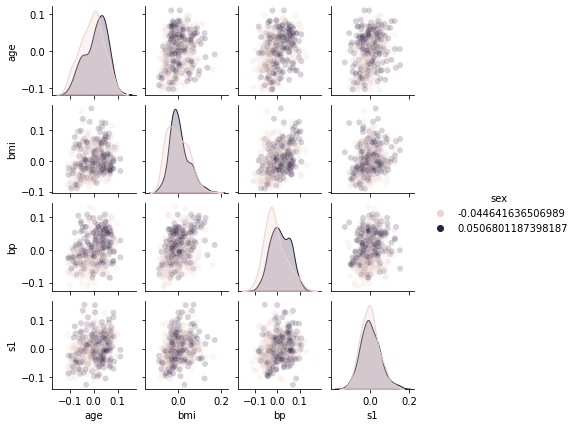

In [13]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             height=1.5, hue='sex', plot_kws={'alpha':.2});

In [18]:
# Building KNN regression 
knn   = neighbors.KNeighborsRegressor(n_neighbors=3)
fit   = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the held-back testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

3613.895895895895

In [20]:
# Linear Regression 
lr    = linear_model.LinearRegression()
fit   = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the unseen testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

3281.2627621854467

In [25]:
# compare knn and regression in one code snippet 
# stand-alone code
from sklearn import (datasets, neighbors,
                     model_selection as skms,
                     linear_model, metrics)

diabetes = datasets.load_diabetes()
tts =  skms.train_test_split(diabetes.data,
                             diabetes.target,
                             test_size=.25,random_state=42)
(diabetes_train, diabetes_test,
 diabetes_train_tgt, diabetes_test_tgt) = tts

models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg' : linear_model.LinearRegression()}

for name, model in models.items():
      fit = model.fit(diabetes_train, diabetes_train_tgt)
      preds = fit.predict(diabetes_test)
      score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
      print("{:>6s} : {:0.2f}".format(name,score))

   kNN : 58.92
linreg : 53.37
